In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [11]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [12]:
df_car = pd.read_csv(r"https://raw.githubusercontent.com/meleshko-anastasiia/DZ/main/Car%20Price.csv")

In [13]:
df_car

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [14]:
#1.Очистите его от выбросов и пропусков

In [15]:
df_car.isna().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df_car.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


<Axes: >

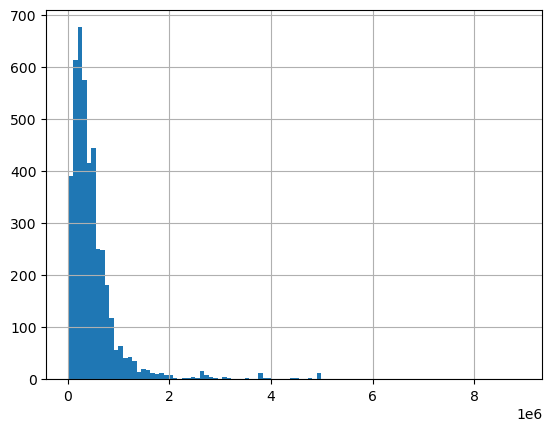

In [17]:
df_car['Selling_Price'].hist(bins = 100)

In [18]:
q1 = df_car['Selling_Price'].quantile(0.25)
q3 = df_car['Selling_Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [-378125.625, 1186875.375]


In [19]:
df_car[(df_car['Selling_Price']<=lower_bound)|(df_car['Selling_Price']>=upper_bound)]

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
12,Toyota,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
25,Toyota,Toyota Corolla Altis 1.8 VL CVT,2018,1650000,25000,Petrol,Dealer,Automatic,First Owner
27,Hyundai,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner
29,Jaguar,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner
30,Mercedes-Benz,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner
...,...,...,...,...,...,...,...,...,...
4224,Toyota,Toyota Fortuner 2.7 2WD AT,2016,2500000,70000,Petrol,Individual,Automatic,Second Owner
4228,Mahindra,Mahindra XUV500 W10 AWD,2015,1225000,70000,Diesel,Individual,Manual,First Owner
4304,Audi,Audi Q5 3.0 TDI Quattro Technology,2018,3899000,22000,Diesel,Dealer,Automatic,First Owner
4311,Toyota,Toyota Camry Hybrid 2.5,2017,1900000,20118,Petrol,Dealer,Automatic,First Owner


In [20]:
df_car[(df_car['Selling_Price']>=lower_bound)&(df_car['Selling_Price']<=upper_bound)]

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
4335,Hyundai,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [21]:
#2.Выберите две количественные переменные и найдите для них 95% доверительные интервалы средних значений. Дайте интерпретацию результата

In [22]:
# Доверительный интервал для стоимости авто на бензине и дизеле

In [23]:
df1 = df_car.loc[df_car['Fuel']=='Petrol', 'Selling_Price']
df2 = df_car.loc[df_car['Fuel']=='Diesel', 'Selling_Price']

alpha = 0.95

mean_1 = df1.mean()
var_1 = df1.var()
n_1 = df1.count()

ci_1 = stats.norm.interval(confidence = alpha, loc = mean_1, scale = np.sqrt(var_1/n_1))
print(f'95% доверительный интервал для средней стоимости авто на бензине от {ci_1[0].round(2)} до {ci_1[1].round(2)} ')

mean_2 = df2.mean()
var_2 = df2.var()
n_2 = df2.count()

ci_2 = stats.norm.interval(confidence = alpha, loc = mean_2, scale = np.sqrt(var_2/n_2))
print(f'95% доверительный интервал для средней стоимости авто на дизеле от {ci_2[0].round(2)} до {ci_2[1].round(2)} ')

95% доверительный интервал для средней стоимости авто на бензине от 329370.36 до 360309.91 
95% доверительный интервал для средней стоимости авто на дизеле от 639539.16 до 698649.34 


In [24]:
# 3.Оцените распределение этих переменных на нормальность с помощью формальных тестов и с помощью альтернативных методов. Сделайте вывод

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


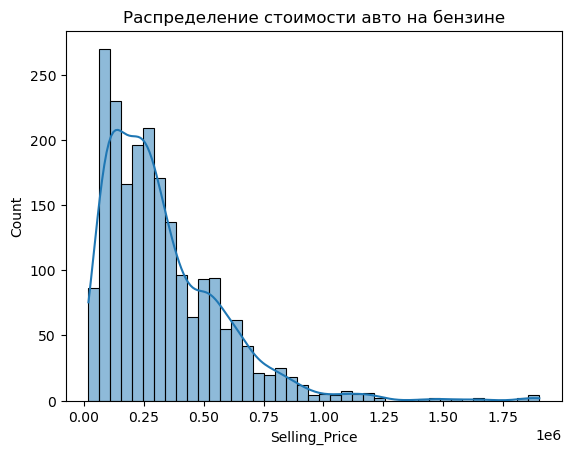

In [25]:
fig = plt.figure()
plt.title('Распределение стоимости авто на бензине')
sns.histplot(df1[df1<2000000], kde = True)
plt.show()

In [26]:
# Тест Шапиро-Уилка
stats.shapiro(df1[df1<2000000])

ShapiroResult(statistic=0.8523497581481934, pvalue=1.2646858770377907e-40)

In [27]:
#p-значение очень маленькое, т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным

In [28]:
#Тест Андерсона-Дарлинга
res_test = stats.anderson(df1[df1<2000000], dist='norm')

In [29]:
res_test.critical_values

array([0.575, 0.655, 0.786, 0.916, 1.09 ])

In [87]:
def anderson_results_2(res_test, sig_level = 5):
    idx = np.argwhere(res_test.significance_level == 5)[0][0]
    #idx = np.where(res_test.significance_level == 5)[0][0]
    crit_value = res_test.critical_values[idx]
    obs_value = res_test.statistic
    decision = np.where(obs_value >= crit_value, 'H0 отвергаем, переменная не имеет нормального распределения', 'H0 не отвергаем, переменная имеет нормальное распределение')
    print('Тестовая статистика:', obs_value)
    print('Критическое значение статистики:', crit_value)
    print('Вывод', decision)

In [88]:
def anderson_results(res_test, sig_level = 5):
    crit_value = res_test.critical_values[res_test.significance_level == sig_level][0]
    obs_value = res_test.statistic
    decision = np.where(obs_value >= crit_value, 'H0 отвергаем, переменная не имеет нормального распределения', 'H0 не отвергаем, переменная имеет нормальное распределение')
    print('Тестовая статистика:', obs_value)
    print('Критическое значение статистики:', crit_value)
    print('Вывод', decision)

In [89]:
anderson_results(res_test)

Тестовая статистика: 63.82892012362572
Критическое значение статистики: 0.786
Вывод H0 отвергаем, переменная не имеет нормального распределения


In [90]:
anderson_results_2(res_test)

Тестовая статистика: 63.82892012362572
Критическое значение статистики: 0.786
Вывод H0 отвергаем, переменная не имеет нормального распределения


In [91]:
#Для уровня значимости 0,05 критическое значение составляет 0,786, а наблюдаемое значение 63,82
#Наблюдаемая статистика гораздо выше критического значения => отвергаем нулевую гипотезу

In [ ]:
# Альтернативные методы тестирования нормальности распределения авто на бензине и дизеле
df1 = df_car.loc[df_car['Fuel']=='Petrol', 'Selling_Price']
df2 = df_car.loc[df_car['Fuel']=='Diesel', 'Selling_Price']

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


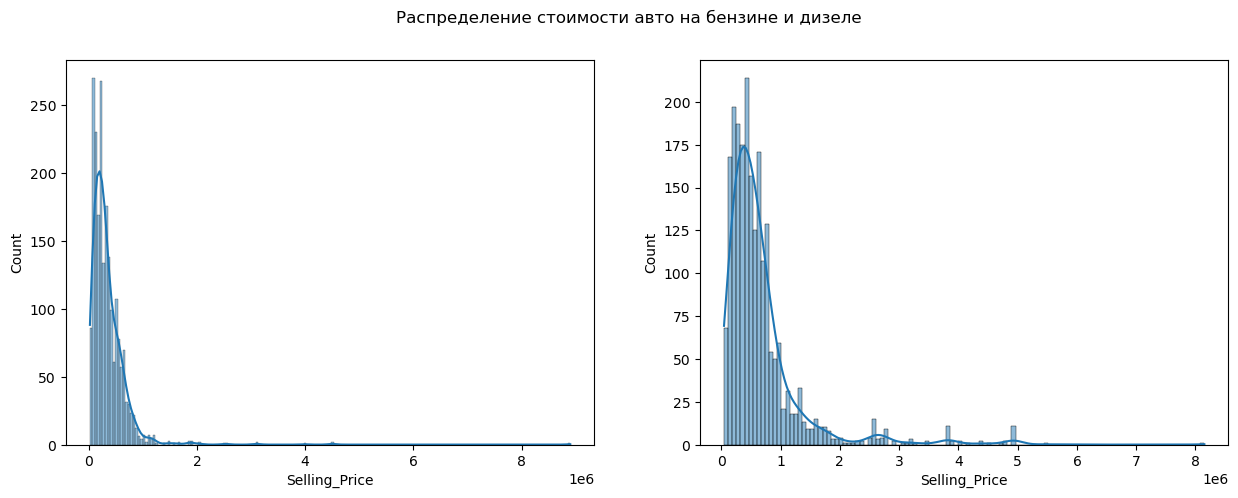

In [113]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение стоимости авто на бензине и дизеле')
sns.histplot(df1, kde = True, ax = ax[0])
sns.histplot(df2, kde = True, ax = ax[1])
plt.show()

In [114]:
print('Средняя: ', df1.mean())
print('Медиана: ', df1.median())
print('Скошенность: ', stats.skew(df1))
print('Эксцесс: ', stats.kurtosis(df1))

Средняя:  344840.1375412153
Медиана:  269000.0
Скошенность:  9.253841476061567
Эксцесс:  168.87140408761263


In [115]:
print('Средняя: ', df2.mean())
print('Медиана: ', df2.median())
print('Скошенность: ', stats.skew(df2))
print('Эксцесс: ', stats.kurtosis(df2))

Средняя:  669094.2522062239
Медиана:  500000.0
Скошенность:  3.7693725257375985
Эксцесс:  19.568835270298823


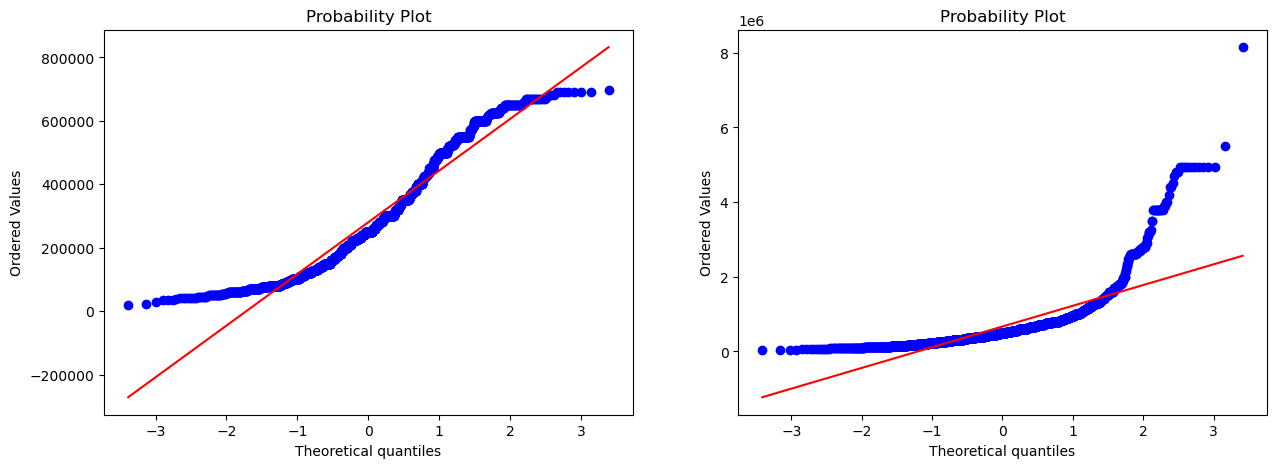

In [118]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot для авто на бензине и дизеле')
stats.probplot(df1[df1<700000], dist="norm", plot = ax[0])
stats.probplot(df2, dist="norm", plot = ax[1])
plt.show()

In [ ]:
#4. Возьмите две группы наблюдений и протестируйте гипотезу о равенстве математических ожиданий ...

In [96]:
df1 = df_car.loc[df_car['Fuel']=='Petrol', 'Selling_Price']
df2 = df_car.loc[df_car['Fuel']=='Diesel', 'Selling_Price']

df1_pr = df_car.loc[(df_car['Fuel']=='Petrol')&(df_car['Selling_Price']<100000)&(df_car['KM_Driven']<5000000), 'KM_Driven']
df2_pr = df_car.loc[(df_car['Fuel']=='Diesel')&(df_car['Selling_Price']<100000)&(df_car['KM_Driven']<5000000), 'KM_Driven']

In [98]:
print('Средний пробег авто на бензине ценой менее 100000 составляет', df1_pr.mean().round(2))

Средний пробег авто на бензине ценой менее 100000 составляет 75842.44


In [99]:
print('Средний пробег авто на дизеле ценой менее 100000 составляет', df2_pr.mean().round(2))

Средний пробег авто на дизеле ценой менее 100000 составляет 116514.29


In [110]:
# Протестируем гипотезу о том, что математическое ожидание пробега авто на бензине составляет 80 000 км

In [111]:
stats.ttest_1samp(df1_pr, popmean = 80000, alternative = 'two-sided')

TtestResult(statistic=-1.8169557559985234, pvalue=0.07031231851752354, df=275)

In [107]:
# p-значение более 5%, то есть нулевую гипотезу отвергнуть нельзя
#Пробег авто на бензине может составлять 80 000 км

In [109]:
#Протестируем гипотезу, что средний пробег авто на дизеле и бензине стоимостью до 100000  совпадают

stats.ttest_ind(df1_pr, df2_pr, alternative = 'two-sided')

TtestResult(statistic=-5.720857962808016, pvalue=2.503633836647356e-08, df=309.0)

In [112]:
# p-значение оказалось ниже 5%, то есть нулевая гипотеза о том, что средний пробег на авто на дизеле и бензине равны, отвергается

In [ ]:
# 5.Постройте точечную диаграмму (scatterplot) и оцените корреляцию между переменными. Сделайте вывод

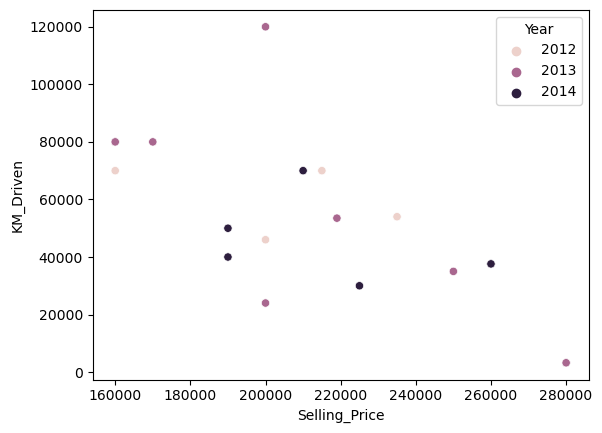

In [70]:
sns.scatterplot(
    data = df_car[(df_car['Year']<=2014)&(df_car['KM_Driven']>0)&(df_car['Model']=='Hyundai EON Era Plus')], 
    x = 'Selling_Price', 
    y = 'KM_Driven', 
    hue = 'Year'
)
plt.show()

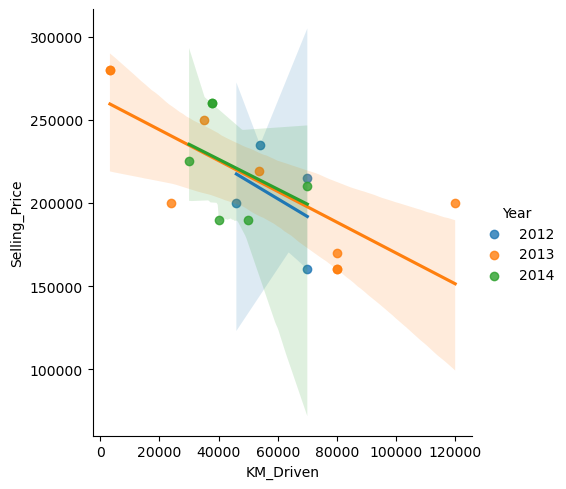

In [68]:
#Для наглядности используем:
sns.lmplot(
    data = df_car[(df_car['Year']<=2014)&(df_car['Model']=='Hyundai EON Era Plus')], 
    x = 'KM_Driven', 
    y = 'Selling_Price', 
    hue = 'Year'
)
plt.show()

In [ ]:
# Корреляция в 2012,13,14 году сильная и близка к -1. 
# Во все года продаж <=2014, при росте пробега, цена продажи на 'Hyundai EON Era Plus' снижалась

In [130]:
# Коэффициенты корреляции Пирсона и Спирмана
stats.pearsonr(df_car['KM_Driven'], df_car['Selling_Price'])

PearsonRResult(statistic=-0.1922886305451153, pvalue=2.0262823832188006e-37)

In [131]:
stats.spearmanr(df_car['KM_Driven'], df_car['Selling_Price'])

SignificanceResult(statistic=-0.3240513938654525, pvalue=1.1646000096357972e-106)

In [94]:
# 6. Оцените модель линейной регрессии. Сделайте на ее основе прогноз и вывод по результатам
data = df_car[(df_car['Year']<=2014)&(df_car['Model']=='Maruti Swift Dzire VDI')]
X = np.array(data['KM_Driven'])
Y = np.array(data['Selling_Price'])
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) # Print the table

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1562
Date:                Sun, 20 Oct 2024   Prob (F-statistic):              0.696
Time:                        14:16:28   Log-Likelihood:                -323.88
No. Observations:                  25   AIC:                             651.8
Df Residuals:                      23   BIC:                             654.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.65e+05   4.53e+04      8.057      0.0

In [96]:
#  0.007 Изменчивость пробега на 0,7% объясняет изменчивость цены
# Между X и Y есть ненулевая зависимость
# Стоимость авто Maruti Swift Dzire VD напрямую зависит от пробега